TECHNICAL ANALYISIS AND REGRESSION FOR FINANCIAL DATA SERIES

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
from pylab import mpl, plt
import quantstats as qs
from datetime import datetime
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline
import math

C:\Users\aaron\AppData\Local\Temp\ipykernel_20780\2842194298.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


WE DOWNLOAD THE FINANCIAL DATA SERIES AND THEIR PRICES FROM YAHOO FINANCE 

In [3]:
ASSETS = ["AAPL", "MSFT", "TSLA", "AMZN", "NVDA", "^GSPC", "^VIX", "GC=F", "EURUSD=X", "GBPEUR=X"]
n_assets = len(ASSETS)
prices_df = yf.download(ASSETS, start = "2019-06-05", end = "2023-06-05")

[*********************100%***********************]  10 of 10 completed


In [4]:
prices_df

Adj Close                                               
                  AAPL        AMZN  EURUSD=X GBPEUR=X         GC=F   
Date                                                                 
2019-06-05   44.276100   86.925003  1.125404  1.12861  1328.300049  \
2019-06-06   44.926151   87.718002  1.122902  1.12980  1337.599976   
2019-06-07   46.121948   90.201500  1.127650  1.12581  1341.199951   
2019-06-10   46.711369   93.031502  1.132016  1.12340  1324.699951   
2019-06-11   47.252262   93.184998  1.131811  1.12121  1326.400024   
...                ...         ...       ...      ...          ...   
2023-05-29         NaN         NaN  1.072306  1.15136          NaN   
2023-05-30  177.300003  121.660004  1.070767  1.15322  1958.000000   
2023-05-31  177.250000  120.580002  1.073307  1.15645  1963.900024   
2023-06-01  180.089996  122.769997  1.069519  1.16387  1978.000000   
2023-06-02  180.949997  124.250000  1.076079  1.16360  1952.400024   

                                                                        ...   
                  MSFT        NVDA        TSLA        ^GSPC       ^VIX  ...   
Date                                                                    ...   
2019-06-05  120.942276   35.127796   13.106000  2826.149902  16.090000  ...  \
2019-06-06  122.854973   35.749397   13.730000  2843.489990  15.930000  ...   
2019-06-07  126.295906   36.177048   13.633333  2873.340088  16.299999  ...   
2019-06-10  127.449295   36.905567   14.192000  2886.729980  15.940000  ...   
2019-06-11  126.968742   37.482422   14.473333  2885.719971  15.990000  ...   
...                ...         ...         ...          ...        ...  ...   
2023-05-29         NaN         NaN         NaN          NaN        NaN  ...   
2023-05-30  331.209991  401.068481  201.160004  4205.520020  17.459999  ...   
2023-05-31  328.390015  378.300842  203.929993  4179.830078  17.940001  ...   
2023-06-01  332.579987  397.658875  207.520004  4221.020020  15.650000  ...   
2023-06-02  335.399994  393.229309  213.970001  4282.370117  14.600000  ...   

                 Volume                                                       
                   AAPL         AMZN EURUSD=X GBPEUR=X     GC=F        MSFT   
Date                                                                          
2019-06-05  119093600.0   84796000.0        0        0    622.0  24926100.0  \
2019-06-06   90105200.0   73786000.0        0        0    161.0  21459000.0   
2019-06-07  122737600.0   96164000.0        0        0    240.0  33885600.0   
2019-06-10  104883600.0  107420000.0        0        0    268.0  26477100.0   
2019-06-11  107731600.0   80854000.0        0        0    201.0  23913700.0   
...                 ...          ...      ...      ...      ...         ...   
2023-05-29          NaN          NaN        0        0      NaN         NaN   
2023-05-30   55964400.0   64314800.0        0        0  37838.0  29503100.0   
2023-05-31   99625300.0   72800800.0        0        0   5959.0  45950600.0   
2023-06-01   68901800.0   54375100.0        0        0    750.0  26773900.0   
2023-06-02   61945900.0   61215000.0        0        0    356.0  25864000.0   

                                                         
                   NVDA         TSLA         ^GSPC ^VIX  
Date                                                     
2019-06-05   51161600.0  202662000.0  3.570760e+09  0.0  
2019-06-06   40814000.0  303633000.0  3.445140e+09  0.0  
2019-06-07   34885600.0  240052500.0  3.244380e+09  0.0  
2019-06-10   40278000.0  158775000.0  3.209890e+09  0.0  
2019-06-11   38387200.0  174802500.0  3.551000e+09  0.0  
...                 ...          ...           ...  ...  
2023-05-29          NaN          NaN           NaN  NaN  
2023-05-30   92340100.0  128818700.0  4.228510e+09  0.0  
2023-05-31  100258000.0  150711700.0  5.980670e+09  0.0  
2023-06-01   63587300.0  148029900.0  4.391860e+09  0.0  
2023-06-02   48165500.0  164129000.0  4.454200e+09  0.0  

[1043

In [5]:
prices_df.head().dropna()

Adj Close                                                          
                 AAPL       AMZN  EURUSD=X GBPEUR=X         GC=F        MSFT   
Date                                                                           
2019-06-05  44.276100  86.925003  1.125404  1.12861  1328.300049  120.942276  \
2019-06-06  44.926151  87.718002  1.122902  1.12980  1337.599976  122.854973   
2019-06-07  46.121948  90.201500  1.127650  1.12581  1341.199951  126.295906   
2019-06-10  46.711369  93.031502  1.132016  1.12340  1324.699951  127.449295   
2019-06-11  47.252262  93.184998  1.131811  1.12121  1326.400024  126.968742   

                                                          ...       Volume   
                 NVDA       TSLA        ^GSPC       ^VIX  ...         AAPL   
Date                                                      ...                
2019-06-05  35.127796  13.106000  2826.149902  16.090000  ...  119093600.0  \
2019-06-06  35.749397  13.730000  2843.489990  15.930000  ...   90105200.0   
2019-06-07  36.177048  13.633333  2873.340088  16.299999  ...  122737600.0   
2019-06-10  36.905567  14.192000  2886.729980  15.940000  ...  104883600.0   
2019-06-11  37.482422  14.473333  2885.719971  15.990000  ...  107731600.0   

                                                                           
                   AMZN EURUSD=X GBPEUR=X   GC=F        MSFT        NVDA   
Date                                                                       
2019-06-05   84796000.0        0        0  622.0  24926100.0  51161600.0  \
2019-06-06   73786000.0        0        0  161.0  21459000.0  40814000.0   
2019-06-07   96164000.0        0        0  240.0  33885600.0  34885600.0   
2019-06-10  107420000.0        0        0  268.0  26477100.0  40278000.0   
2019-06-11   80854000.0        0        0  201.0  23913700.0  38387200.0   

                                            
                   TSLA         ^GSPC ^VIX  
Date                                        
2019-06-05  202662000.0  3.570760e+09  0.0  
2019-06-06  303633000.0  3.445140e+09  0.0  
2019-06-07  240052500.0  3.244380e+09  0.0  
2019-06-10  158775000.0  3.209890e+09  0.0  
2019-06-11  174802500.0  3.551000e+09  0.0  

[5 rows x 60 columns]

In [6]:
prices_df.tail().dropna()

Adj Close                                               
                  AAPL        AMZN  EURUSD=X GBPEUR=X         GC=F   
Date                                                                 
2023-05-30  177.300003  121.660004  1.070767  1.15322  1958.000000  \
2023-05-31  177.250000  120.580002  1.073307  1.15645  1963.900024   
2023-06-01  180.089996  122.769997  1.069519  1.16387  1978.000000   
2023-06-02  180.949997  124.250000  1.076079  1.16360  1952.400024   

                                                                        ...   
                  MSFT        NVDA        TSLA        ^GSPC       ^VIX  ...   
Date                                                                    ...   
2023-05-30  331.209991  401.068481  201.160004  4205.520020  17.459999  ...  \
2023-05-31  328.390015  378.300842  203.929993  4179.830078  17.940001  ...   
2023-06-01  332.579987  397.658875  207.520004  4221.020020  15.650000  ...   
2023-06-02  335.399994  393.229309  213.970001  4282.370117  14.600000  ...   

                Volume                                                      
                  AAPL        AMZN EURUSD=X GBPEUR=X     GC=F        MSFT   
Date                                                                        
2023-05-30  55964400.0  64314800.0        0        0  37838.0  29503100.0  \
2023-05-31  99625300.0  72800800.0        0        0   5959.0  45950600.0   
2023-06-01  68901800.0  54375100.0        0        0    750.0  26773900.0   
2023-06-02  61945900.0  61215000.0        0        0    356.0  25864000.0   

                                                         
                   NVDA         TSLA         ^GSPC ^VIX  
Date                                                     
2023-05-30   92340100.0  128818700.0  4.228510e+09  0.0  
2023-05-31  100258000.0  150711700.0  5.980670e+09  0.0  
2023-06-01   63587300.0  148029900.0  4.391860e+09  0.0  
2023-06-02   48165500.0  164129000.0  4.454200e+09  0.0  

[4 rows x 60 columns]

Text(0.5, 1.0, 'Adj Close')

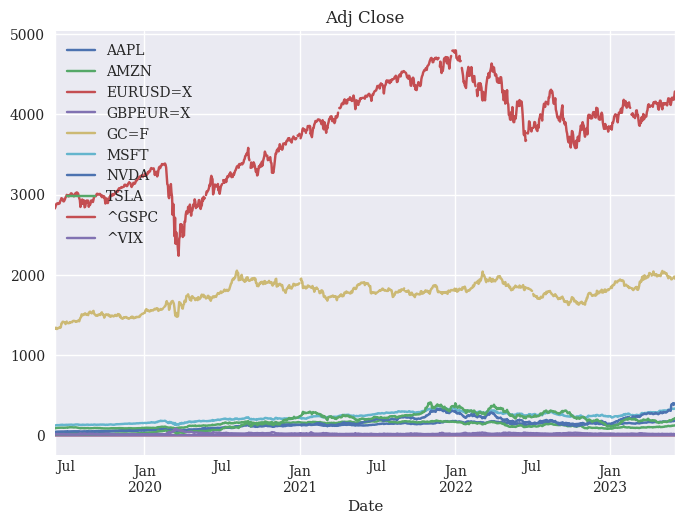

In [7]:
prices_df["Adj Close"].plot()
plt.title('Adj Close')

In [8]:
prices_df["Adj Close"].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1043 entries, 2019-06-05 to 2023-06-02
Freq: B
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   AAPL      1007 non-null   float64
 1   AMZN      1007 non-null   float64
 2   EURUSD=X  1043 non-null   float64
 3   GBPEUR=X  1043 non-null   float64
 4   GC=F      1009 non-null   float64
 5   MSFT      1007 non-null   float64
 6   NVDA      1007 non-null   float64
 7   TSLA      1007 non-null   float64
 8   ^GSPC     1007 non-null   float64
 9   ^VIX      1007 non-null   float64
dtypes: float64(10)
memory usage: 89.6 KB


In [9]:
prices_df["Adj Close"].describe().round(2)

,AAPL,AMZN,EURUSD=X,GBPEUR=X,GC=F,MSFT,NVDA,TSLA,^GSPC,^VIX
count,1007.00,1007.00,1043.00,1043.00,1009.00,1007.00,1007.00,1007.00,1007.00,1007.00
mean,121.15,130.73,1.12,1.15,1758.01,229.75,152.44,175.90,3758.31,22.86
std,39.16,31.84,0.06,0.03,158.63,58.38,77.57,106.19,574.55,8.49
min,44.28,81.82,0.96,1.06,1324.70,120.94,35.13,13.11,2237.40,11.54
25%,79.95,97.74,1.08,1.12,1684.20,181.48,88.23,60.01,3237.05,17.29
50%,131.75,127.90,1.12,1.15,1788.90,238.84,142.18,195.25,3881.37,21.38
75%,150.35,161.19,1.18,1.17,1866.50,277.12,205.48,251.09,4188.28,26.28
max,180.95,186.57,1.23,1.21,2051.50,338.34,401.07,409.97,4796.56,82.69


In [10]:
prices_df["Adj Close"].mean()

AAPL         121.147659
AMZN         130.725165
EURUSD=X       1.119495
GBPEUR=X       1.149018
GC=F        1758.011297
MSFT         229.746996
NVDA         152.440668
TSLA         175.898282
^GSPC       3758.314281
^VIX          22.862999
dtype: float64

In [11]:
prices_df["Adj Close"].aggregate([min, np.mean, np.std, np.median, max]).round(2)

,AAPL,AMZN,EURUSD=X,GBPEUR=X,GC=F,MSFT,NVDA,TSLA,^GSPC,^VIX
min,44.28,81.82,0.96,1.06,1324.70,120.94,35.13,13.11,2237.40,11.54
mean,121.15,130.73,1.12,1.15,1758.01,229.75,152.44,175.90,3758.31,22.86
std,39.16,31.84,0.06,0.03,158.63,58.38,77.57,106.19,574.55,8.49
median,131.75,127.90,1.12,1.15,1788.90,238.84,142.18,195.25,3881.37,21.38
max,180.95,186.57,1.23,1.21,2051.50,338.34,401.07,409.97,4796.56,82.69


WE CALCULATE INDIVIDUAL ASSET RETURNS 

In [12]:
returns = prices_df["Adj Close"].pct_change().dropna()

In [13]:
returns

,AAPL,AMZN,EURUSD=X,GBPEUR=X,GC=F,MSFT,NVDA,TSLA,^GSPC,^VIX
Date,,,,,,,,,,
2019-06-06,0.014682,0.009123,-0.002223,0.001054,0.007001,0.015815,0.017695,0.047612,0.006136,-0.009944
2019-06-07,0.026617,0.028312,0.004229,-0.003532,0.002691,0.028008,0.011962,-0.007041,0.010498,0.023227
2019-06-10,0.012780,0.031374,0.003871,-0.002141,-0.012302,0.009132,0.020138,0.040978,0.004660,-0.022086
2019-06-11,0.011579,0.001650,-0.000181,-0.001949,0.001283,-0.003771,0.015631,0.019823,-0.000350,0.003137
2019-06-12,-0.003183,-0.004496,0.001008,0.001614,0.004147,-0.004618,-0.030183,-0.036112,-0.002038,-0.005003
...,...,...,...,...,...,...,...,...,...,...
2023-05-29,0.000000,0.000000,-0.000129,0.002464,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-05-30,0.010660,0.012905,-0.001435,0.001616,0.007150,-0.005047,0.029913,0.041363,0.000017,-0.027298
2023-05-31,-0.000282,-0.008877,0.002372,0.002801,0.003013,-0.008514,-0.056767,0.013770,-0.006109,0.027491


WE DEFINE THE WEIGHTS

In [14]:
portfolio_weights = n_assets *[1/n_assets]

In [15]:
portfolio_weights

[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

WE CALCULATE PORTFOLIO RETURNS

In [16]:
portfolio_returns = pd.Series(np.dot(portfolio_weights, returns.T),index = returns.index)

In [17]:
portfolio_returns

Date
2019-06-06    0.010695
2019-06-07    0.012497
2019-06-10    0.008640
2019-06-11    0.004685
2019-06-12   -0.007886
                ...   
2023-05-29    0.000234
2023-05-30    0.006984
2023-05-31   -0.003110
2023-06-01    0.000799
2023-06-02   -0.001435
Freq: B, Length: 1042, dtype: float64

BASIC PERFORMANCE EVALUATION PLOTS

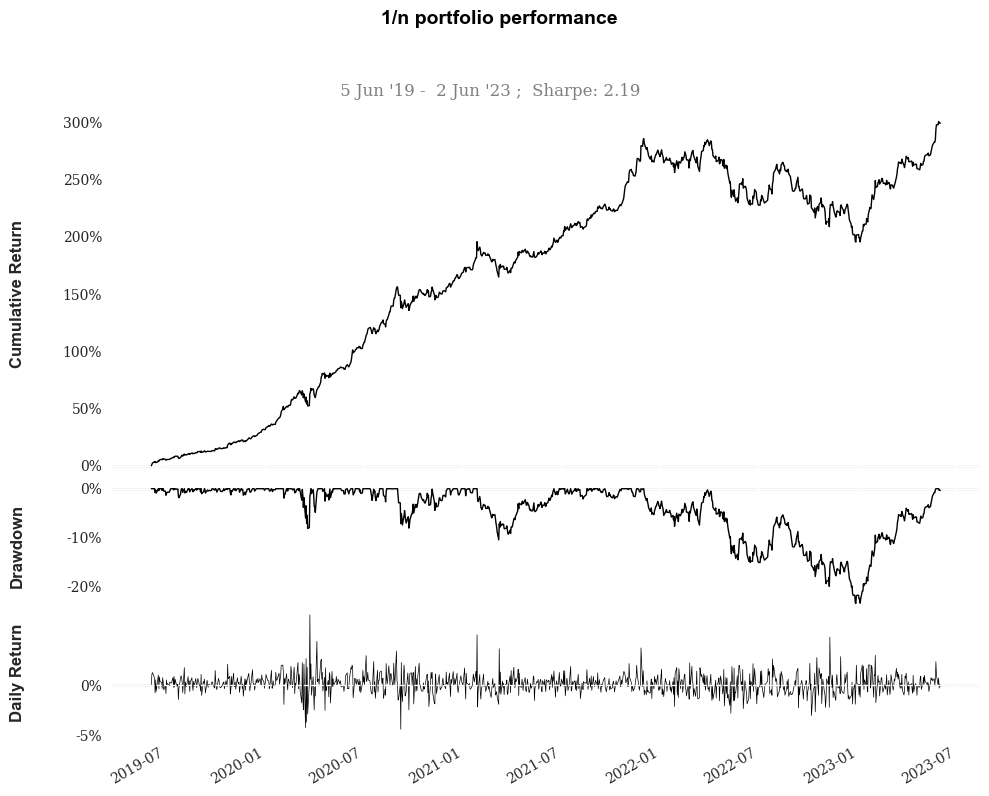

In [18]:
qs.plots.snapshot(portfolio_returns, title = "1/n portfolio performance", grayscale = True)

BASIC PORTFOLIO EVALUATION METRICS

In [19]:
qs.reports.metrics(portfolio_returns, mode = "basic", prepare_returns= False)

                    Strategy
------------------  ----------
Start Period        2019-06-06
End Period          2023-06-02
Risk-Free Rate      0.0%
Time in Market      100.0%

Cumulative Return   299.02%
CAGR﹪              41.44%

Sharpe              2.19
Prob. Sharpe Ratio  100.0%
Sortino             3.58
Sortino/√2          2.53
Omega               1.47

Max Drawdown        -23.42%
Longest DD Days     539

Gain/Pain Ratio     0.47
Gain/Pain (1M)      3.02

Payoff Ratio        1.13
Profit Factor       1.47
Common Sense Ratio  1.9
CPC Index           0.94
Tail Ratio          1.29
Outlier Win Ratio   3.53
Outlier Loss Ratio  3.56

MTD                 -0.06%
3M                  16.19%
6M                  21.76%
YTD                 32.27%
1Y                  15.57%
3Y (ann.)           25.43%
5Y (ann.)           41.44%
10Y (ann.)          41.44%
All-time (ann.)     41.44%

Avg. Drawdown       -1.43%
Avg. Drawdown Days  15
Recovery Factor     12.77
Ulcer Index         0.07
Serenity Index    

WE CALCULATE CHANGES IN TIME SERIES OVER TIME: ABOLUTE DIFFERENCES

In [20]:
prices_df["Adj Close"].diff().head().dropna()

,AAPL,AMZN,EURUSD=X,GBPEUR=X,GC=F,MSFT,NVDA,TSLA,^GSPC,^VIX
Date,,,,,,,,,,
2019-06-06,0.650051,0.792999,-0.002502,0.00119,9.299927,1.912697,0.621601,0.624000,17.340088,-0.160000
2019-06-07,1.195797,2.483498,0.004748,-0.00399,3.599976,3.440933,0.427650,-0.096666,29.850098,0.369999
2019-06-10,0.589420,2.830002,0.004366,-0.00241,-16.500000,1.153389,0.728519,0.558667,13.389893,-0.360000
2019-06-11,0.540894,0.153496,-0.000205,-0.00219,1.700073,-0.480553,0.576855,0.281333,-1.010010,0.050000


In [21]:
prices_df["Adj Close"].diff().mean().dropna()

AAPL        0.154556
AMZN        0.010097
EURUSD=X   -0.000047
GBPEUR=X    0.000034
GC=F        0.625051
MSFT        0.235602
NVDA        0.363674
TSLA        0.199520
^GSPC       1.749693
^VIX       -0.036732
dtype: float64

PERCENTAGE CHANGES

In [22]:
prices_df["Adj Close"].pct_change().round(3).head().dropna()

,AAPL,AMZN,EURUSD=X,GBPEUR=X,GC=F,MSFT,NVDA,TSLA,^GSPC,^VIX
Date,,,,,,,,,,
2019-06-06,0.015,0.009,-0.002,0.001,0.007,0.016,0.018,0.048,0.006,-0.010
2019-06-07,0.027,0.028,0.004,-0.004,0.003,0.028,0.012,-0.007,0.010,0.023
2019-06-10,0.013,0.031,0.004,-0.002,-0.012,0.009,0.020,0.041,0.005,-0.022
2019-06-11,0.012,0.002,-0.000,-0.002,0.001,-0.004,0.016,0.020,-0.000,0.003


WE PLOT MEAN VALUES OF PERCENTAGE CHANGES

<Axes: >

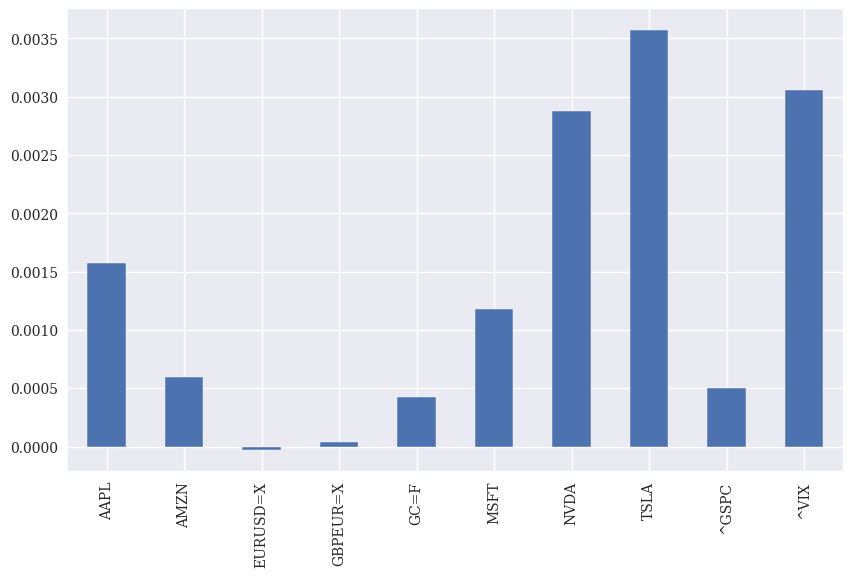

In [23]:
prices_df["Adj Close"].pct_change().mean().dropna().plot(kind = 'bar', figsize = (10,6))

CUMULATIVE LOG RETURNS FOR FINANCIAL TIME SERIES

In [24]:
rets = np.log(prices_df["Adj Close"]/prices_df["Adj Close"].shift(1))
rets.head().round(3).dropna()

,AAPL,AMZN,EURUSD=X,GBPEUR=X,GC=F,MSFT,NVDA,TSLA,^GSPC,^VIX
Date,,,,,,,,,,
2019-06-06,0.015,0.009,-0.002,0.001,0.007,0.016,0.018,0.047,0.006,-0.010
2019-06-07,0.026,0.028,0.004,-0.004,0.003,0.028,0.012,-0.007,0.010,0.023
2019-06-10,0.013,0.031,0.004,-0.002,-0.012,0.009,0.020,0.040,0.005,-0.022
2019-06-11,0.012,0.002,-0.000,-0.002,0.001,-0.004,0.016,0.020,-0.000,0.003


Text(0.5, 1.0, 'Cumulative Log Returns over time')

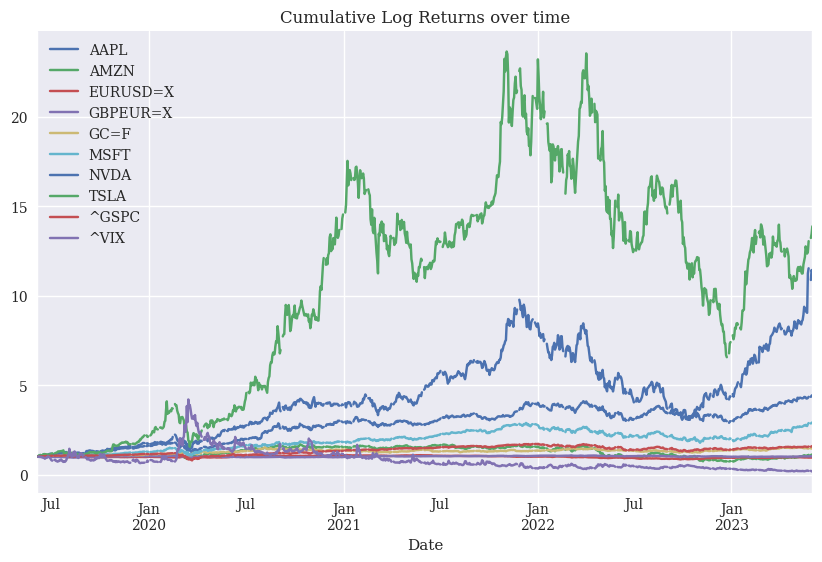

In [25]:
rets.cumsum().apply(np.exp).plot(figsize= (10,6))
plt.title('Cumulative Log Returns over time')

FINANCIAL INDICATORS FOR A SINGLE FINANCIAL TIME SERIES 

In [26]:
ticker = ["NVDA"]
data = yf.download(ticker, start = "2019-06-05", end = "2023-06-05")


[*********************100%***********************]  1 of 1 completed


In [27]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-06-05,36.492500,36.547501,34.955002,35.320000,35.127800,51161600
2019-06-06,35.362499,36.192501,35.337502,35.945000,35.749393,40814000
2019-06-07,36.005001,36.720001,35.812500,36.375000,36.177055,34885600
2019-06-10,36.939999,37.797501,36.939999,37.107498,36.905567,40278000
2019-06-11,37.709999,38.090000,37.290001,37.687500,37.482418,38387200
...,...,...,...,...,...,...
2023-05-26,378.899994,391.700012,375.500000,389.459991,389.419678,71439700
2023-05-30,405.950012,419.380005,399.489990,401.109985,401.068481,92340100
2023-05-31,394.880005,402.950012,378.220001,378.339996,378.300842,100258000


In [28]:
data["Adj Close"] 

Date
2019-06-05     35.127800
2019-06-06     35.749393
2019-06-07     36.177055
2019-06-10     36.905567
2019-06-11     37.482418
                 ...    
2023-05-26    389.419678
2023-05-30    401.068481
2023-05-31    378.300842
2023-06-01    397.658875
2023-06-02    393.229309
Name: Adj Close, Length: 1007, dtype: float64

Text(0.5, 1.0, 'Adj Close (NVDA)')

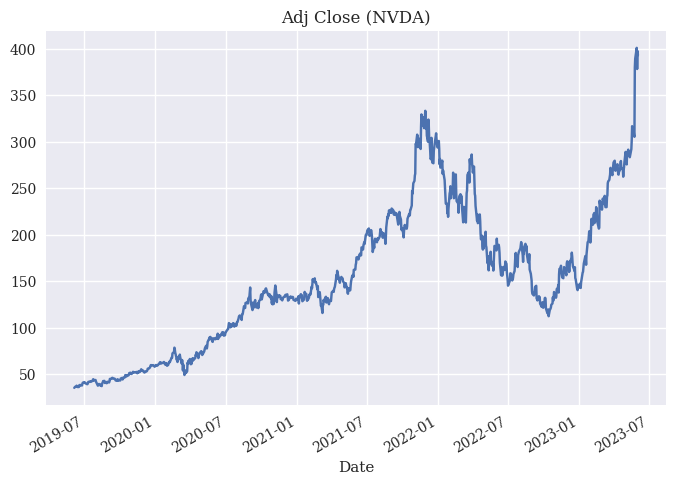

In [29]:
data["Adj Close"].plot()
plt.title('Adj Close (NVDA)')


In [30]:
log_returns= np.log(data["Adj Close"]/data["Adj Close"].shift(1)).dropna()

Text(0.5, 1.0, 'daily log returns (NVDA)')

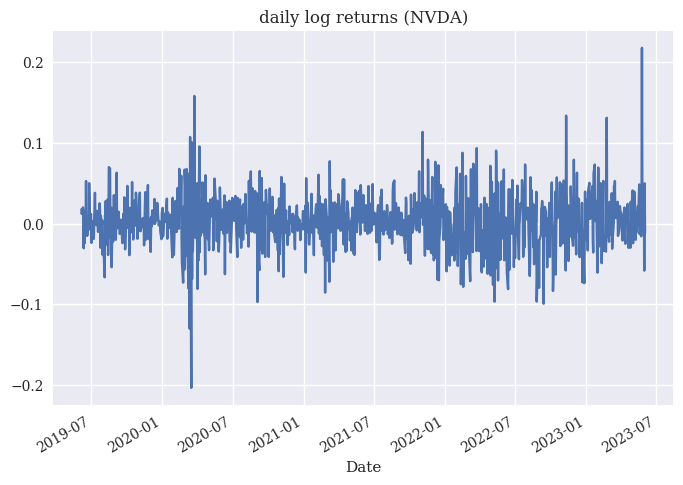

In [31]:
log_returns.plot()
plt.title('daily log returns (NVDA)')

In [32]:
window = 20
data['min']= data["Adj Close"].rolling(window=window).min()
data['mean']= data["Adj Close"].rolling(window=window).mean()
data['std']= data["Adj Close"].rolling(window=window).std()
data['median']= data["Adj Close"].rolling(window=window).median()
data['max']= data["Adj Close"].rolling(window=window).max()
data['ewma']= data["Adj Close"].ewm(halflife=0.5, min_periods=window).mean()

In [33]:
data.dropna().head()

,Open,High,Low,Close,Adj Close,Volume,min,mean,std,median,max,ewma
Date,,,,,,,,,,,,
2019-07-02,41.375000,41.587502,40.424999,40.557499,40.336792,40022800,35.127800,37.855245,1.829979,37.698725,41.316433,40.541990
2019-07-03,40.792500,40.849998,40.084999,40.687500,40.466084,24663600,35.749393,38.122159,1.800297,37.845419,41.316433,40.485060
2019-07-05,40.099998,40.145000,39.419998,40.057499,39.839520,39655200,35.963219,38.326665,1.748129,37.984659,41.316433,40.000905
2019-07-08,39.457500,39.647499,39.000000,39.302502,39.088631,32978800,35.963219,38.472244,1.679584,38.041847,41.316433,39.316699
2019-07-09,38.877499,39.610001,38.750000,39.327499,39.113483,34286000,35.963219,38.582640,1.643360,38.193521,41.316433,39.164287


WE PLOT FOUR ROLLING STATISTICS FOR THE FINAL 200 DATA ROW ( INCLUDES EWMA: EXPONENTIAL WEIGHTED MOVING AVERAGE)
AND WE ADD THE ORIGINAL SERIES DATA TO THE PLOT 

Text(0.5, 1.0, 'Rolling Statistics for NVDA')

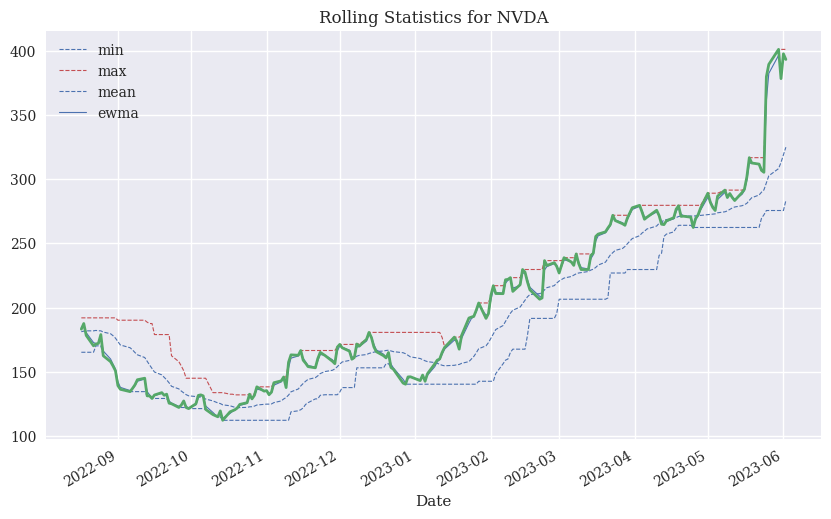

In [34]:
ax = data[['min', 'max', 'mean', 'ewma']].iloc[-200:].plot(figsize=(10,6), style=['b--', 'r--', 'b--'], lw=0.8)
data["Adj Close"].iloc[-200:].plot(ax=ax, lw=2.0);
plt.title('Rolling Statistics for NVDA')    
     

In [35]:
import pandas.io as web

TECHNICAL ANALYSIS FOR NVDA. SMA (SIMPLE MOVING AVERAGES).SHORTER-TERM SMA VS LONGER-TERM SMA

In [36]:
data['252d'] = data['SMA1'] = data["Adj Close"].rolling(window=252).mean()
data['42d'] = data['SMA2']= data["Adj Close"].rolling(window=42).mean()
data[['Adj Close', '42d', '252d']].tail()

,Adj Close,42d,252d
Date,,,
2023-05-26,389.419678,286.466545,190.846591
2023-05-30,401.068481,289.591698,191.730494
2023-05-31,378.300842,292.079774,192.485994
2023-06-01,397.658875,294.934955,193.323821
2023-06-02,393.229309,297.639914,194.158025


Text(0.5, 1.0, 'NVDA Stock Price and Simple Moving Averages')

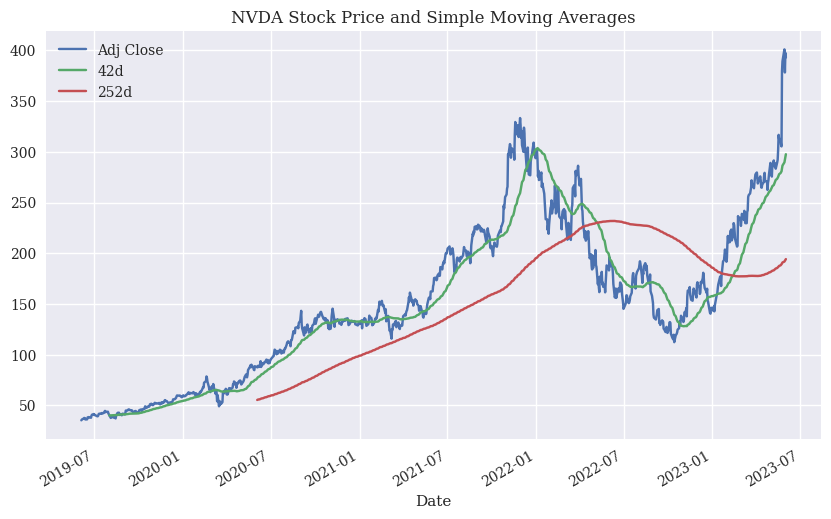

In [37]:
data[['Adj Close', '42d', '252d']].plot(figsize=(10,6))
plt.title('NVDA Stock Price and Simple Moving Averages')

Text(0.5, 1.0, 'NVDA Stock Price and Simple Moving Averages and Positions')

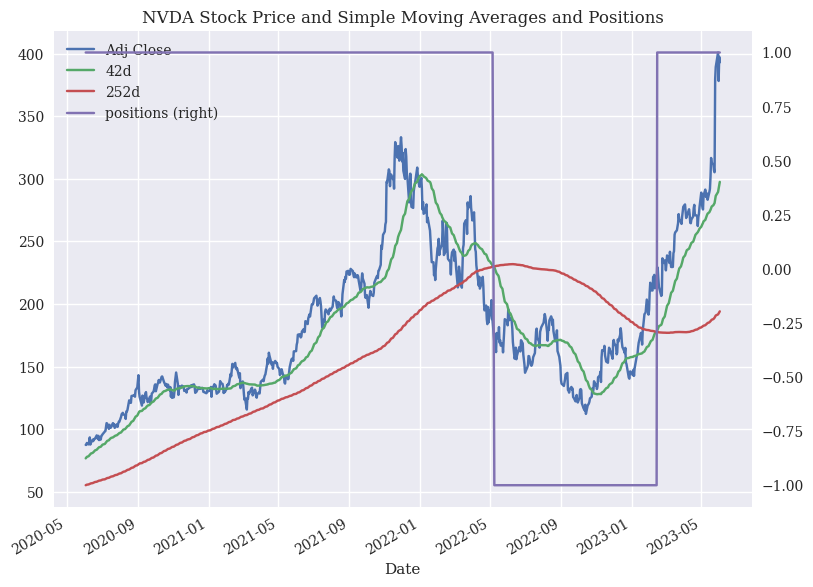

In [38]:
data.dropna(inplace=True)
data['positions'] = np.where(data['42d']> data['252d'], 1, -1)
ax = data[['Adj Close', '42d', '252d', 'positions']].plot(figsize=(9,7), secondary_y='positions')
plt.title('NVDA Stock Price and Simple Moving Averages and Positions')
 

CORRELATION ANALYSIS. S&P 500 STOCK INDEX VS VIX VOLATILITY INDEX

In [39]:
ASSETS =["^GSPC", "^VIX"]
n_assets = len(ASSETS)
prices_df = yf.download(ASSETS, start= "2019-06-05", end= "2023-06-05")

[*********************100%***********************]  2 of 2 completed


In [40]:
prices_df.head().dropna()

Adj Close                   Close                    High   
                  ^GSPC       ^VIX        ^GSPC       ^VIX        ^GSPC   
Date                                                                      
2019-06-05  2826.149902  16.090000  2826.149902  16.090000  2827.280029  \
2019-06-06  2843.489990  15.930000  2843.489990  15.930000  2852.100098   
2019-06-07  2873.340088  16.299999  2873.340088  16.299999  2884.969971   
2019-06-10  2886.729980  15.940000  2886.729980  15.940000  2904.770020   
2019-06-11  2885.719971  15.990000  2885.719971  15.990000  2910.610107   

                               Low                    Open              
                 ^VIX        ^GSPC       ^VIX        ^GSPC       ^VIX   
Date                                                                    
2019-06-05  17.490000  2800.919922  16.040001  2818.090088  17.059999  \
2019-06-06  16.540001  2822.449951  15.360000  2828.510010  16.250000   
2019-06-07  16.440001  2852.870117  15.330000  2852.870117  15.650000   
2019-06-10  16.469999  2885.510010  15.840000  2885.830078  16.299999   
2019-06-11  16.700001  2878.530029  15.500000  2903.270020  15.840000   

                Volume       
                 ^GSPC ^VIX  
Date                         
2019-06-05  3570760000    0  
2019-06-06  3445140000    0  
2019-06-07  3244380000    0  
2019-06-10  3209890000    0  
2019-06-11  3551000000    0

Text(0.5, 1.0, 'S&P500 and VIX Time Series Data')

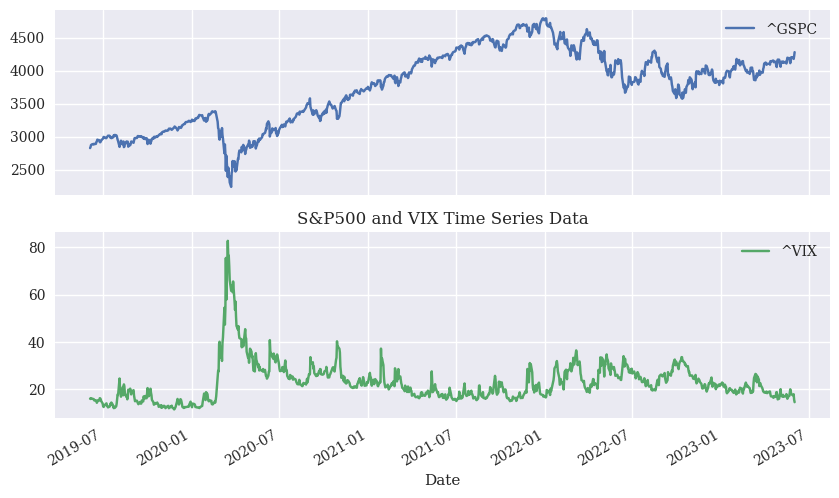

In [65]:
prices_df["Adj Close"].plot(subplots=True, figsize=(10,6))
plt.title('S&P500 and VIX Time Series Data')

WE GET LOGARITHMIC RETURNS FOR BOTH TIME SERIES DATA

In [55]:
returns=np.log(prices_df['Adj Close']/prices_df['Adj Close'].shift(1)).dropna()

In [56]:
returns.head()

,^GSPC,^VIX
Date,,
2019-06-06,0.006117,-0.009994
2019-06-07,0.010443,0.022961
2019-06-10,0.004649,-0.022333
2019-06-11,-0.000350,0.003132
2019-06-12,-0.002040,-0.005016


Text(0.5, 1.0, 'Log Returns for S&P500 and VIX')

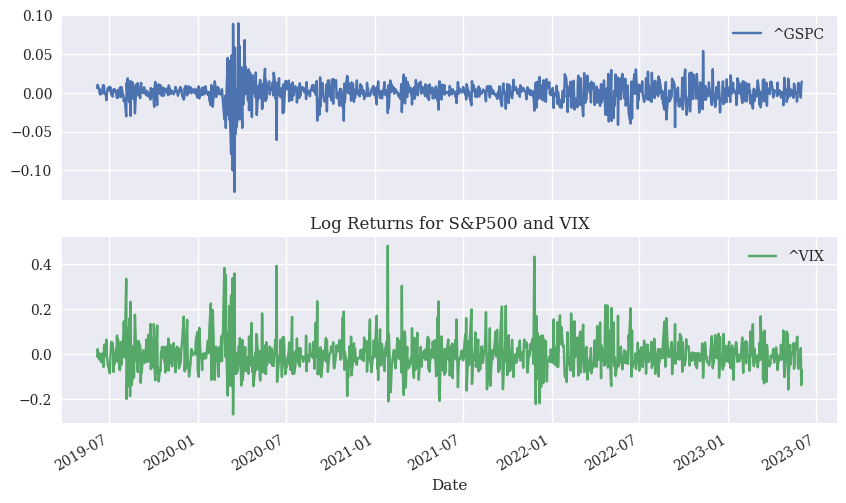

In [66]:
returns.dropna(inplace=True)
returns.plot(subplots=True, figsize=(10,6))
plt.title('Log Returns for S&P500 and VIX')

WE PLOT S&P500 and VIX AS A SCATTER MATRIX

array([[<Axes: xlabel='^GSPC', ylabel='^GSPC'>,
        <Axes: xlabel='^VIX', ylabel='^GSPC'>],
       [<Axes: xlabel='^GSPC', ylabel='^VIX'>,
        <Axes: xlabel='^VIX', ylabel='^VIX'>]], dtype=object)

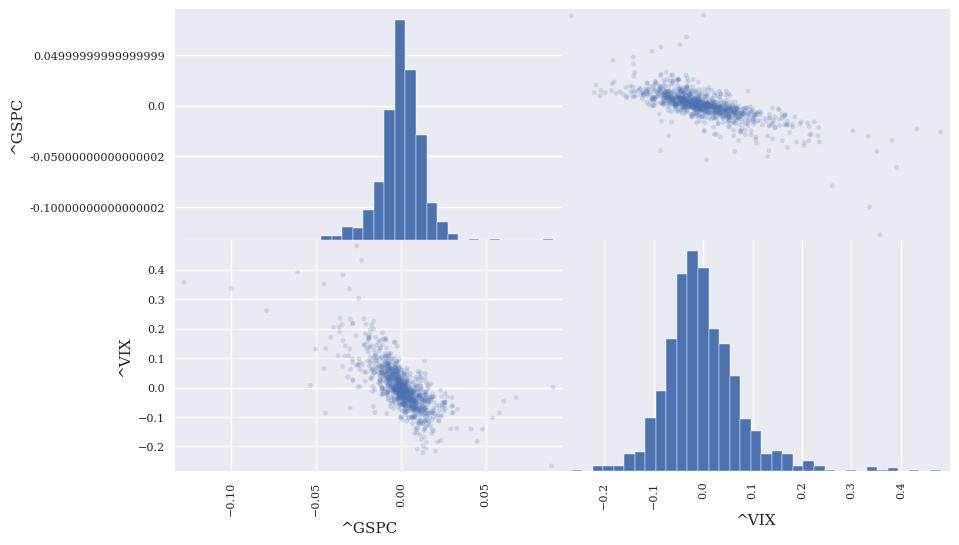

In [60]:
pd.plotting.scatter_matrix(returns, alpha=0.2, diagonal='hist', hist_kwds={'bins':35}, figsize=(10,6))

WE IMPLEMENT AN ORDINARY LEAST-SQUARES (OLS) REGRESSION ANALYSIS

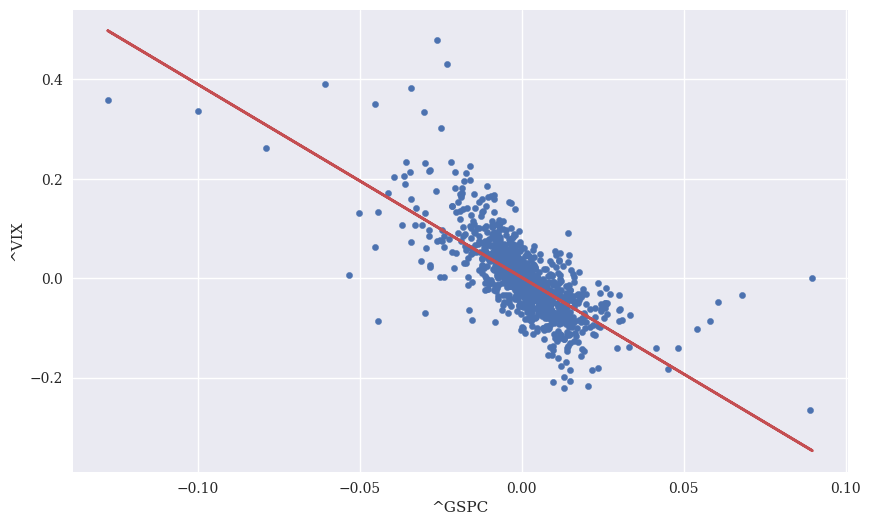

In [61]:
reg= np.polyfit(returns['^GSPC'], returns['^VIX'], deg=1)
ax= returns.plot(kind='scatter', x='^GSPC', y= '^VIX', figsize=(10,6))
ax.plot(returns['^GSPC'], np.polyval(reg, returns['^GSPC']), 'r', lw=2)

WE DETERMINE THE CORRELATION

In [62]:
returns.corr()

,^GSPC,^VIX
^GSPC,1.000000,-0.714446
^VIX,-0.714446,1.000000


Text(0.5, 1.0, 'Correlation between S&P500 and VIX: static and rolling')

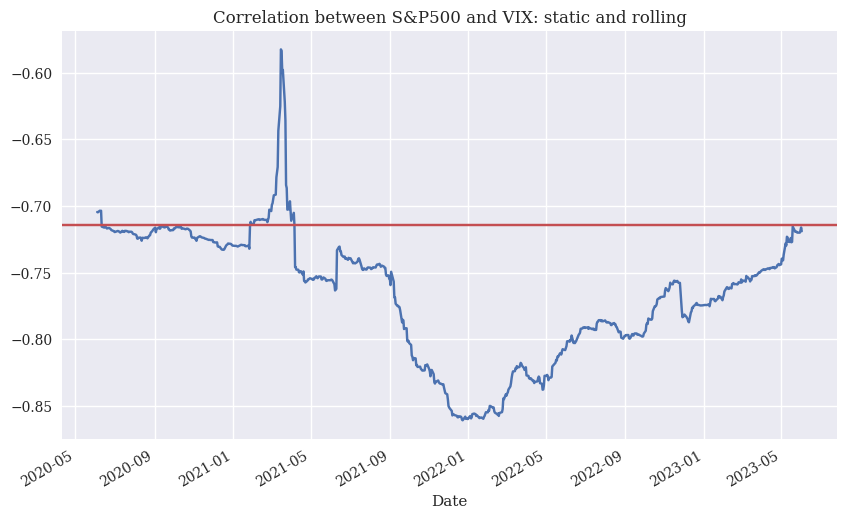

In [64]:
ax=returns['^GSPC'].rolling(window=252).corr(returns['^VIX']).plot(figsize=(10,6))
ax.axhline(returns.corr().iloc[0,1], c='r')
plt.title('Correlation between S&P500 and VIX: static and rolling')